# 02506 Test Exam 2021

In [15]:
#! pip install --upgrade numpy
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imshow

import maxflow.fastmin

from skimage.draw import polygon2mask
import cv2
from shapely.geometry import Polygon
import scipy
from skimage import color

import torch


## Question 1: Scale-normalized Laplacian
The scale normalized laplacian is 
$$
t\nabla^2 L = t(L_{xx}+L_{yy})
$$
where $t$ is the variance.

In [2]:
t = np.array([10, 11, 12, 13])
Lxx = np.array([6.24, 6.04, 5.12, 4.16])
Lyy = np.array([7.11, 7.12, 7.16, 6.16])
res = t*(Lxx+Lyy)
idx = t == 12
print(idx)
print(f"The scale normalizes laplacian for t={t[idx]} is {res[idx]}")

[False False  True False]
The scale normalizes laplacian for t=[12] is [147.36]


Which is answer (g).

## Question 2: Image Scale-space
Laplacian scale-space may be used for detecting blobs in an image I.
Which of the following statements is correct?

Due to the seperability of the Laplacian, $\nabla^2 L = L_{xx}+L_{yy}$, andd since the Gaussian kernel is given by $g(x,y,t)=\frac{1}{2\pi t}e^{\frac{-(x^2+y^2)}{2t}}$ the correct answer is (d):

*Scale-space is obtained by smoothing, so the Laplacian scale-space is obtained
by smoothing with two orthogonal 1D kernels $g=\frac{1}{\sqrt{2\pi t}}e^{-\frac{u^2}{2t}}$ where t is
the scale.*

## Question 3: Blob detection 
In scale-space blob detection, we use the Laplacian scale space. For
a small image region we have computed the linear scale-space r2L shown below using
scale steps of $\Delta t =1$. We focus on a pixel in position $(r,c) = (4,2)$.
<br>
From page 21: *Remember that the radius of the blobs are $\sqrt{2t}$, so you can look at the size of the structures that you
want to detect to decide a good range of scales.*

<p align="center"> 
  <img src="./screenshots/q3.png" width="600">
</p>

Since we detect a local maxima, it is a **dark** blob. Thus the correct answer is
<br>
*(c) A dark blob is detected in position $(r,c) = (4,2)$ and it has a size corresponding to a circle with a radius of approximately $\sqrt{2*3}$*

## Question 4: Dictionary clustering 
We use probabilistic clustering-based segmentation as in the lecture notes Section 3.1.


In [3]:
dist = np.loadtxt('data/distances.txt')
labels = np.loadtxt('data/labels.txt')

closest = np.argmin(dist,axis=0)
idx = closest == (2-1)

print(labels)
for i in np.unique(labels):
    print(f"p(x={i})={sum(labels[idx] == i)/np.size(labels[idx])}")

[1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1.]
p(x=1.0)=0.5384615384615384
p(x=2.0)=0.46153846153846156


Which is closests to (f) 0.54

## Question 5: Smooth segmentation
Below we show the probability image for three labels obtained
using dictionary-based segmentation.

In [4]:
p1 = np.mean([0.04, 0, 0, 0, 0])
p2 = np.mean([0.01, 0.15, 0.90, 0.01, 0.02])
p3 = np.mean([0.98, 0.85, 0.06, 0.98, 0.98])
print(f"p = {(p1,p2,p3)}")

p = (0.008, 0.21800000000000003, 0.77)


(c) Without noise reduction, a pixel (r; c) = (2; 3) has label 2 and with noise reduction it will have label 3.

## Question 6: Feature-based registration

[False False False  True False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False]


Text(0.5, 1.0, 'Outliers')

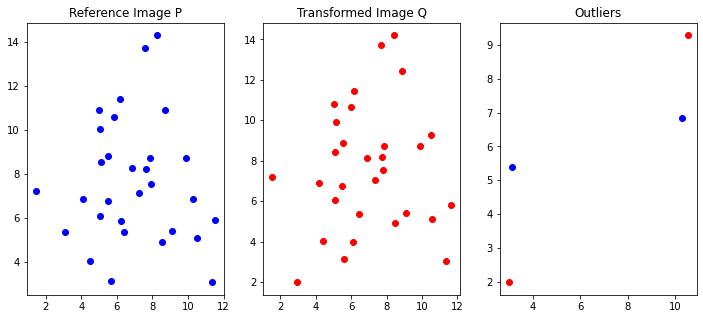

In [5]:
P = np.loadtxt('data/points_p.txt')
Q = np.loadtxt('data/points_q.txt')

# Rotation
theta = (140/360)*2*np.pi
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

# Translation
t = np.array([[36],[13]])

# Scaling
s = 1.7

# Transformation
# Ptrans = s*R@P+t
Qtrans = (1/s)*np.linalg.inv(R)@(Q-t)

# Outliers
outliers = np.array([np.linalg.norm(Qtrans[:,i]-P[:,i]) for i in range(len(Q[0]))]) > 2.0
print(outliers)


fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
ax1.scatter(P[0],P[1],color='blue')
ax1.set_title("Reference Image P")
ax2.scatter(Qtrans[0],Qtrans[1],color='red')
ax2.set_title("Transformed Image Q")
ax3.scatter(P[0][outliers],P[1][outliers],color='blue')
ax3.scatter(Qtrans[0][outliers],Qtrans[1][outliers],color='red')
ax3.set_title("Outliers")

So we see that there are two outliers which is answer (c).

## Question 7: SIFT Features
- S: Scale
- I: Invariant
- F: Feature
- T: Transformation
<br>
#### As of page 35 SIFT is
- unique such that they encode just one position in an image,
- invariant to change in view-point, overall intensity change, and change in noise level,
- robust such that they will be detected despite image changes, and
- efficient with respect to memory and computational time.

Since SIFt is not robust to mirroring, answer D is wrong. There is no specific level of change for which the algorithm works, thus C is wrong. Since SIFT **is** invariant to intensity change/illumination, B is wrong. Thus A is correct.

## Question 8: Gaussian Features
The derivatives up the the third order is
$[L,L_{x},L_{y},L_{xx},L_{xy},L_{yy},L_{xxx},L_{xxy},L_{xyy},L_{yyy}]$
So if we have three scales and $10$ derivatives the output image will have $3\times 10=30 $ channels and the answer is (g).

## Question 9: Image Gradient


In [6]:
img = np.array([[181, 158, 145],[209, 175, 147],[210, 215, 211]])
hor = -img[1,0]+img[1,2]
ver = -img[0,1]+img[2,1]
print(f"The magnitude of the derivative is {np.sqrt(hor**2+ver**2)}")

The magnitude of the derivative is 84.21995013059554


Which is answer (e)

## Question 10: Markovv Random Fields
We are asked to compute the change in the segmentation energy

In [7]:
def segmentation_energy(S, I, mu, beta):

    if (np.size(mu) == 3):
    
        # likelihood energy
        likelihood = int(((mu[S0]-I)**2).sum())
        
        # prior energy
        prior = beta * ((S0[1:,:]!=S0[:-1,:]).sum() + (S0[:,1:]!=S0[:,:-1]).sum())
    else :  
        # likelihood energy
        likelihood = ((mu[S]-I)**2).sum()
        
        # prior energy
        V2x = S[1:,:]!=S[:-1,:]
        V2y = S[:,1:]!=S[:,:-1]
        prior = beta * (V2x.sum() + V2y.sum())
    
    print(f'Likelihood: {int(likelihood)}\nprior: {prior}\nposterior: {int(likelihood+prior)}')

    return(likelihood,prior)



img = np.array([
    [14, 40, 30, 45, 32, 40],
    [33, 32, 40, 50, 23, 20],
    [30, 35, 34, 45, 25, 21],
    [31, 25, 40, 52, 20, 27],
    [30, 38, 32, 40, 25, 20]
    ]).astype(float)

# Initial segmentation
S1 = np.zeros(img.shape).astype(int)
S1[0,0] = 1
S1[1,0] = 1
S1[2:,3] = 1
S1[:,4:] = 1
print(S1)

# Updated segmentation
S2 = np.copy(S1)
S2[3,3] = 0

# Means of the two classes
mu = np.array([30, 20]) # [mu_0 mu_1]

# Smoothness parameter
beta = 125

V1_1, V2_1 = segmentation_energy(S1, img, mu, beta)
V1_2, V2_2 = segmentation_energy(S2, img, mu, beta)

[[1 0 0 0 1 1]
 [1 0 0 0 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]]
Likelihood: 3971
prior: 1125
posterior: 5096
Likelihood: 3431
prior: 1375
posterior: 4806


And the segmentation energy is the same as the posterior energy

In [8]:
(int(V1_2+V2_2))-(int(V1_1+V2_1))

-290

which is answer (d).

## Question 11: MRF - Posterior Energy of Maximum Likelihood Segmentation

/home/antonrydahl/anaconda3/envs/image_analysis/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


Likelihood: 883802
prior: 104300
posterior: 988102


(883802, 104300)

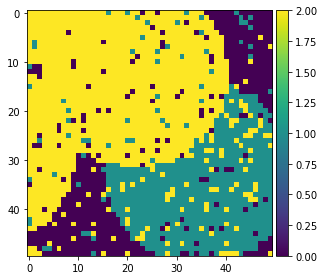

In [9]:
I = np.array(imread('data/circly.png'),dtype=float)

# Centers
mu = np.array([70, 120, 180], dtype=float)
# Smoothness
beta = 100

U = np.stack([I-mu[0], I-mu[1], I-mu[2]], axis=2)**2

#%% C computing MAP using graph cuts
S0 = np.argmin(U, axis=2)
S_GC = S0.copy()
seg = maxflow.fastmin.aexpansion_grid(U, beta - 
                            beta*np.eye(3, 3, dtype=U.dtype), labels = S_GC)

imshow(seg)
mu[seg]
segmentation_energy(seg, I, mu, beta)


So te posterior energy is 988102 which is answer (h)

## Question 12: Binary MRF


Likelihood: 25013381
prior: 2244000
posterior: 27257381
The area of the bright class is 5810


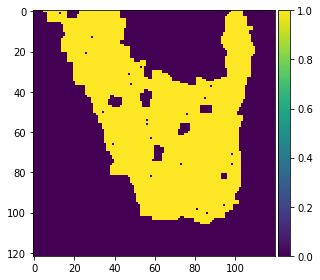

In [10]:
I = np.array(imread('data/bony.png'),dtype=float)

# Centers
mu = np.array([130, 190], dtype=float)
# Smoothness
beta = 3000

U = np.stack([I-mu[0], I-mu[1]], axis=2)**2

#%% C computing MAP using graph cuts
S0 = np.argmin(U, axis=2)
S_GC = S0.copy()
seg = maxflow.fastmin.aexpansion_grid(U, beta - 
                            beta*np.eye(2,2, dtype=U.dtype), labels = S_GC)

imshow(seg)
mu[seg]
segmentation_energy(seg, I, mu, beta)

print(f"The area of the bright class is {sum(sum(seg > 0))}")

and 5810 corresponds to answer (c).

## Question 13: Deformable Models
Which of the following statement is **not** correct with regards to
deformable models?
- Internal forces are computed based on the curve and the image intensities. - **false**, the internal forces depend only on the shape of the curve, see equation 6.2
- For an outward pointing normal, the scalar component of the force must be negative for the curve to move inwards. -true
- External forces are computed based on the curve and image intensities. - true, see equation 6.1
- A parametric curve can be represented by points connected by straight line segments. - true

## Question 14: Deformable Models - External Force
What is the **scalar component** of the external force acting on the curve point at the
bottom left corner (highlighted) of this square?

The scalar external force in the corner point is [-0.18334913]


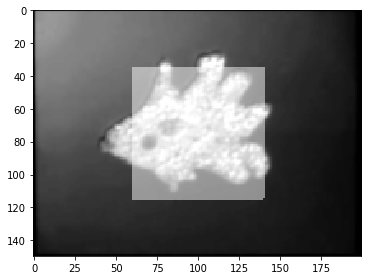

In [47]:
def get_circle_snake(frame,num_points = 100):
    avals = np.linspace(0,2*np.pi,num_points)
    H,W = np.shape(frame)
    r = H/5
    x0 = H/2
    y0 = W/2
    x = np.array([x0+r*np.cos(a) for a in avals])
    y = np.array([y0+r*np.sin(a) for a in avals])
    snake = np.array([x,y]).T.astype(int)
    return snake

def get_square_snake(frame,r = 40):
    H,W = np.shape(frame)
    x0 = int(H/2)
    y0 = int(W/2)
    vert = np.arange(x0-r,x0+r)
    hor = np.arange(y0-r,y0+r)
    x = np.concatenate((0*hor+x0+r,vert,np.flip(x0-r+0*hor),np.flip(vert)))
    y = np.concatenate((hor,y0+r+0*vert,np.flip(hor),np.flip(y0-r+0*vert)))
    snake = np.array([x,y]).T.astype(int)
    return snake

def get_int_ext(frame,snake):
    frame_shape = np.shape(frame)
    interior = polygon2mask(frame_shape,snake)
    exterior = np.logical_not(interior)
    return interior, exterior

def get_means(frame,snake):
    frame_shape = np.shape(frame)
    interior, exterior = get_int_ext(frame,snake)
    mu_in = np.mean(frame[interior])
    mu_out = np.mean(frame[exterior])
    return mu_in,mu_out


def get_force(frame,snake,num_points=100):
    mu_in,mu_out = get_means(frame,snake)
    F_ext = np.zeros([num_points,1])
    for i,cords in enumerate(snake):
        x,y = cords
        scale = (mu_in-mu_out)*(2*frame[x,y]-mu_in-mu_out)
        F_ext[i] = scale
    return F_ext



def regularization_matrix_version2(N, alpha, beta):
    d = alpha*np.array([-2, 1, 0, 0]) + beta*np.array([-6, 4, -1, 0])
    D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=np.int)
    A = d[np.minimum(D,len(d)-1)]
    return(scipy.linalg.inv(np.eye(N)-A))


def disp_img_with_snake(img,snake):
    alpha = 0.2

    alpha = 0.5 # that's your transparency factor
    polygon = Polygon(snake[:,[1,0]])
    int_coords = lambda x: np.array(x).round().astype(np.int32)
    exterior = [int_coords(polygon.exterior.coords)]

    image = img.copy()
    overlay = image.copy()
    cv2.fillPoly(overlay, exterior, color=(255, 255, 0))
    cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
    imshow(image)

img = imread('data/frame.png')
img_gray = img.copy().astype(float)/255.0

snake = get_square_snake(img_gray,r = 40)

disp_img_with_snake(img,snake)

F = get_force(img_gray,snake,num_points=np.size(snake[:,]))

print(f"The scalar external force in the corner point is {F[0]}")

which is close to -0.19 which is answer (f)

## Question 15: Curve Smoothing
We use formula 1.13 from page 10:
$$
X^{new}=(I-\alpha A - \beta B)^-1X
$$

In [73]:
alpha = 0.05
beta = 0.1
A = np.array([0, 1, -2, 1, 0])
B = np.array([-1,4,-6,4,-1])

S = np.array([[3.5,0.2],[1.4,1.1],[0.1,2.9],[1.2,5.4],[3.3,7.1]])

# REMEMBER 0 INDEX HERE
mid = 2
print(S[mid]+alpha*A@S+beta*B@S)

[0.52  3.065]


which is answer (d).

## Question 16: Surface detection
<p align="center"> 
  <img src="./screenshots/q16.png" width="300">
</p>
Since both in the x and y direction the maximum change is 3 we must have that $\Delta x \geq 3$. Thus only answer (d) is possible.